# Modeling - Random Forest

In [2]:
import pickle
import pandas as pd
import numpy as np
import yaml


In [160]:
try:
    with open("../config.yaml", 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading config file')

## Datetime info represented cyclically - no OHE of station ids

In [49]:
data_cyc = pd.read_csv(config['data']['data_with_ids_cyc'])

In [50]:
data_cyc

,weekday,start_station_id,count,start_station_name,start_lat,start_lng,temperature_f,precipitation_in,windspeed_mph,special_event,week_number_sin,week_number_cos,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,4,4993.13,1,Old Slip & South St,40.703367,-74.007868,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,-0.900969,0.000000,1.000000
1,4,5065.12,1,William St & Pine St,40.707179,-74.008873,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,-0.900969,0.000000,1.000000
2,4,5114.06,1,West Thames St,40.708347,-74.017134,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,-0.900969,0.000000,1.000000
3,4,5137.11,1,Fulton St & William St,40.709601,-74.006551,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,-0.900969,0.000000,1.000000
4,4,5137.13,1,Spruce St & Gold St,40.710323,-74.004323,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-5.000000e-01,-0.866025,0.433884,-0.900969,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321124,5,5216.06,9,Vesey St & Church St,40.712455,-74.010822,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.900969,-0.258819,0.965926
321125,5,5288.08,1,Park Pl & Church St,40.713089,-74.009329,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.900969,-0.258819,0.965926
321126,5,5288.09,4,Warren St & W Broadway,40.714740,-74.009106,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.900969,-0.258819,0.965926
321127,5,5288.12,1,Murray St & Greenwich St,40.714694,-74.011219,68.8,0.0,4.7,0,-3.216245e-16,-1.0,1.224647e-16,-1.000000,-0.433884,-0.900969,-0.258819,0.965926


### Define X and y

In [51]:
y = data_cyc['count'].copy()
X = data_cyc.drop(['count', 'start_station_name', 'start_lat', 'start_lng', 'weekday'], axis=1).copy()

In [52]:
X.head()

,start_station_id,temperature_f,precipitation_in,windspeed_mph,special_event,week_number_sin,week_number_cos,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,4993.13,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-0.5,-0.866025,0.433884,-0.900969,0.0,1.0
1,5065.12,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-0.5,-0.866025,0.433884,-0.900969,0.0,1.0
2,5114.06,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-0.5,-0.866025,0.433884,-0.900969,0.0,1.0
3,5137.11,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-0.5,-0.866025,0.433884,-0.900969,0.0,1.0
4,5137.13,78.6,0.0,3.2,0,-3.216245e-16,-1.0,-0.5,-0.866025,0.433884,-0.900969,0.0,1.0


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321129 entries, 0 to 321128
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_station_id  321129 non-null  float64
 1   temperature_f     321129 non-null  float64
 2   precipitation_in  321129 non-null  float64
 3   windspeed_mph     321129 non-null  float64
 4   special_event     321129 non-null  int64  
 5   week_number_sin   321129 non-null  float64
 6   week_number_cos   321129 non-null  float64
 7   month_sin         321129 non-null  float64
 8   month_cos         321129 non-null  float64
 9   weekday_sin       321129 non-null  float64
 10  weekday_cos       321129 non-null  float64
 11  hour_sin          321129 non-null  float64
 12  hour_cos          321129 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 31.9 MB


### Train test split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [55]:
X_train.columns

Index(['start_station_id', 'temperature_f', 'precipitation_in',
       'windspeed_mph', 'special_event', 'week_number_sin', 'week_number_cos',
       'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'hour_sin',
       'hour_cos'],
      dtype='object')

### Random Forest Regressor on cyclic dataset, no OHE

In [56]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [57]:
rfr.score(X_test, y_test)

0.7767086174289629

## Optimizing hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)

param_grid = {'n_estimators':[100, 300],
                'max_depth':[None, 2,5],
                'min_samples_split':[2,5],
                'min_samples_leaf':[1,2,5],
                'max_features':[0.3, 1.0, 'sqrt']}

# initialize
grid_search = GridSearchCV(rfr,param_grid, cv=5, return_train_score=True, n_jobs=2, verbose=1)


# fit
grid_search.fit(X_train,y_train)
grid_search.best_score_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


0.7891105477969294

In [16]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [17]:
with open('../gridsearch/rfr_no_OHE.pkl', "wb") as file:
    pickle.dump(grid_search, file)

## running with optimal hyperparameters

In [59]:
from sklearn.ensemble import RandomForestRegressor

rfr2 = RandomForestRegressor(random_state=0,
                            max_depth=None,
                            max_features=1.0,
                            min_samples_leaf=5,
                            min_samples_split=2,
                            n_estimators=300)

rfr2.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=300, random_state=0)

In [60]:
rfr2.score(X_test, y_test)

0.7876879472180693

In [61]:
with open('../models/rfr_no_OHE2.pkl', "wb") as file:
    pickle.dump(rfr2, file)

In [21]:
from functions import error_metrics_report, plot_real_predicted

In [63]:
y_test_pred = rfr2.predict(X_test)

In [64]:
y_train_pred = rfr2.predict(X_train)

In [65]:
y_test_pred_rounded = np.round(y_test_pred, decimals=0)

In [66]:
y_train_pred_rounded =np.round(y_train_pred, decimals=0)

In [25]:
error_metrics_report(y_train, y_test, y_train_pred, y_test_pred)

,Metric,Train,Test
0,MAE,1.52,2.08
1,MSE,4.71,8.75
2,RMSE,2.17,2.96
3,R2,0.88,0.79


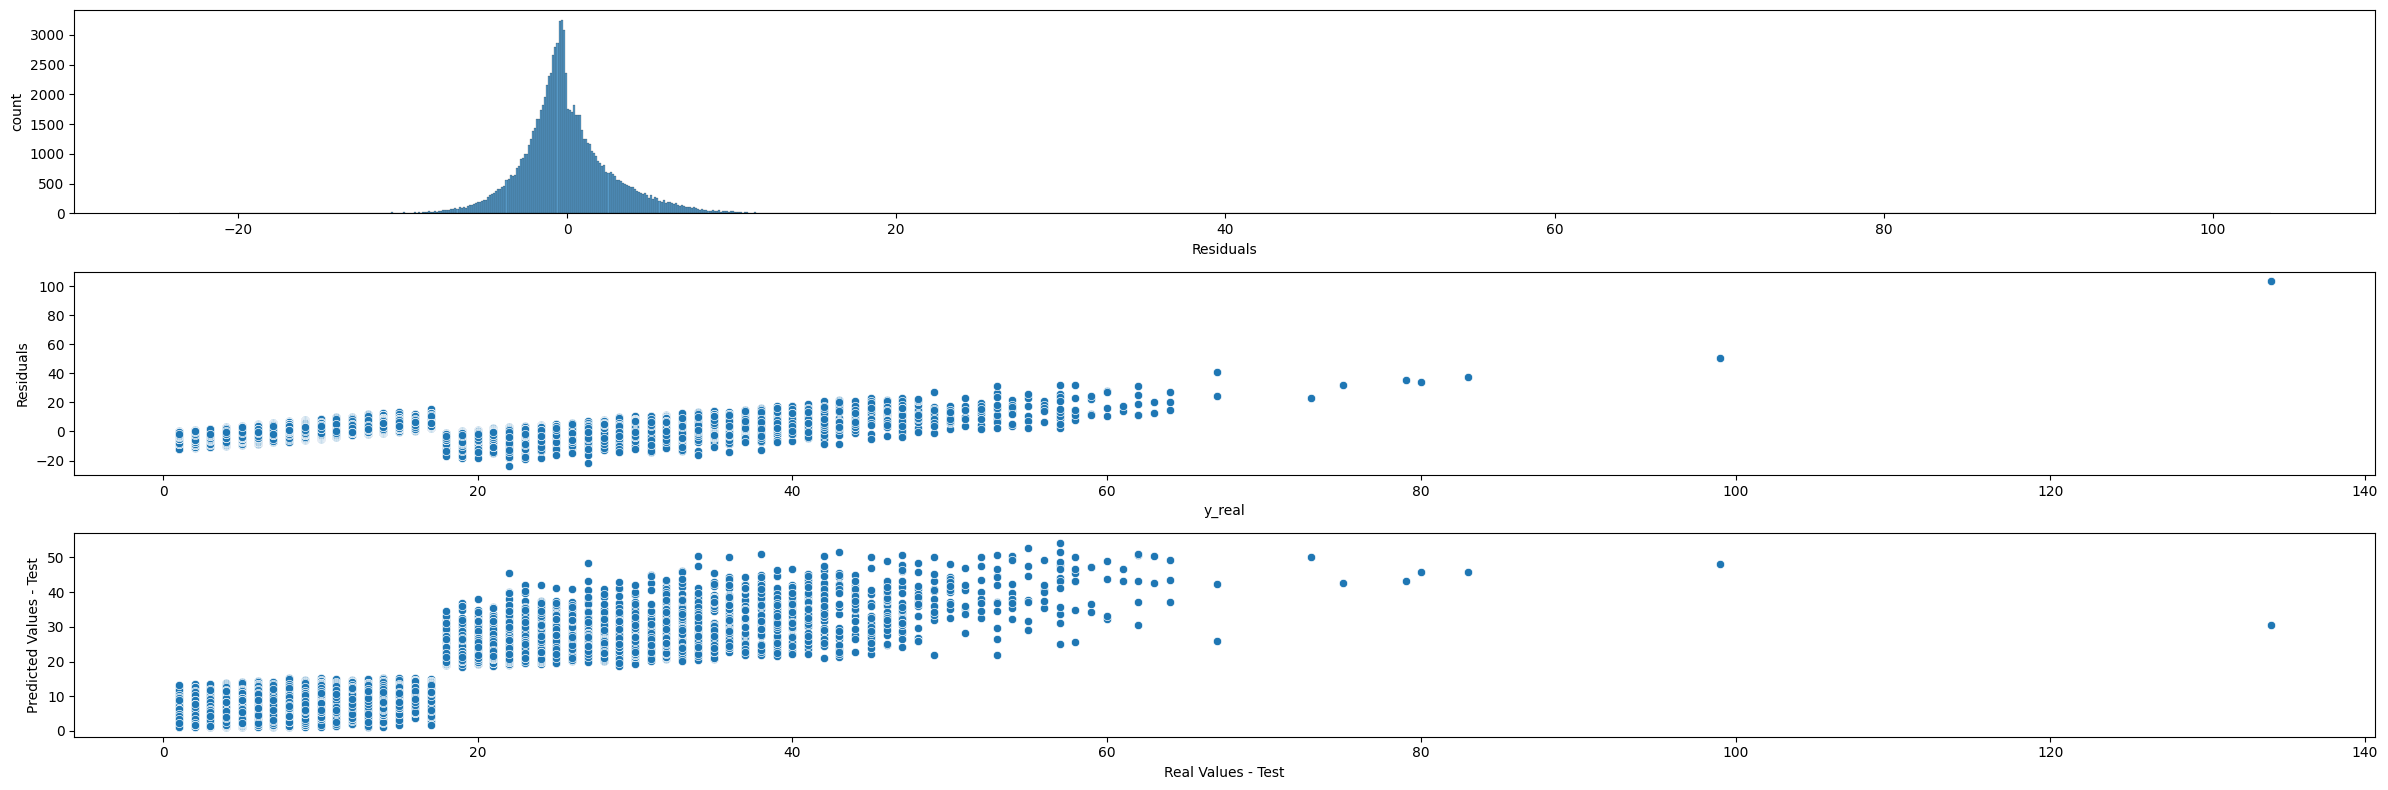

In [26]:
plot_real_predicted('test', y_test, y_test_pred)

In [67]:
#rounded value
error_metrics_report(y_train, y_test, y_train_pred_rounded, y_test_pred_rounded)

,Metric,Train,Test
0,MAE,1.49,2.06
1,MSE,4.77,8.84
2,RMSE,2.18,2.97
3,R2,0.88,0.79


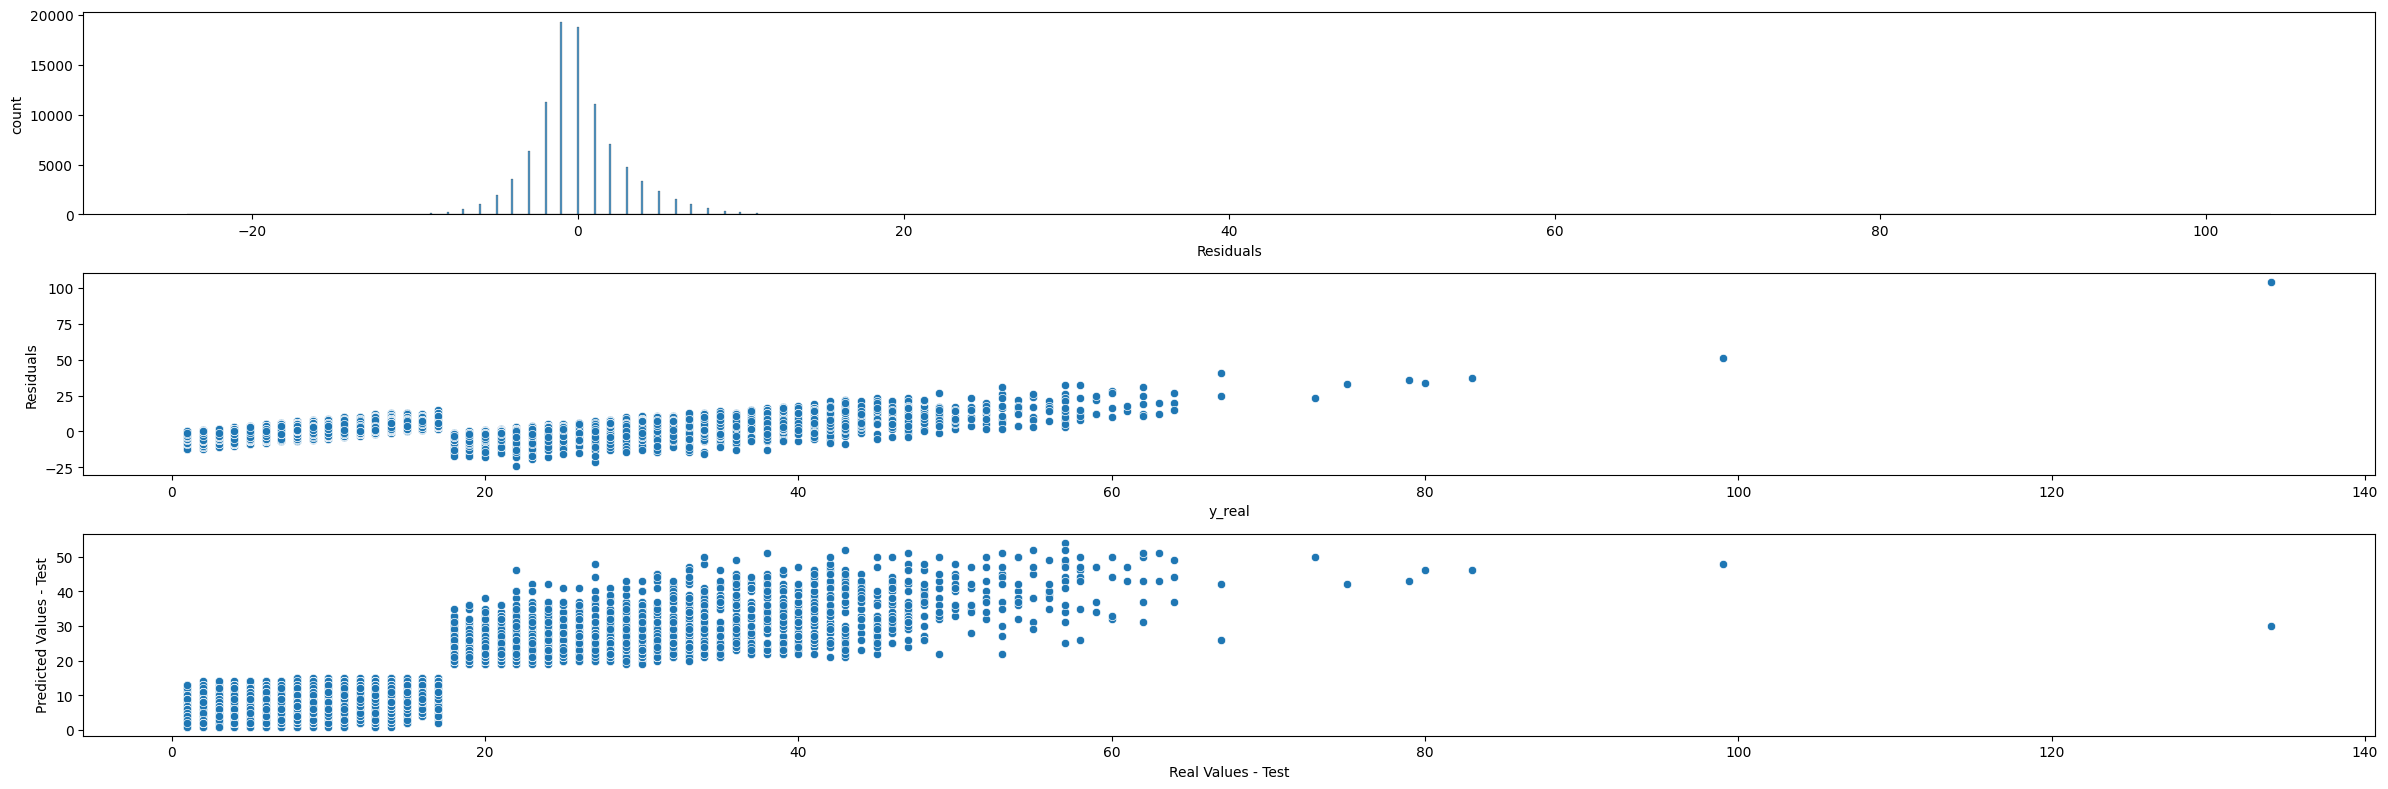

In [68]:
plot_real_predicted('test', y_test, y_test_pred_rounded)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
y_test_pred_rounded[:2]

array([6., 2.])

In [30]:
y_test[:2]

197129    4
205309    1
Name: count, dtype: int64

In [70]:
y_test_pred_rounded_lst = y_test_pred_rounded.tolist()

In [173]:
#get X dataset with the weekday numbers
test_data = pd.read_csv(config['data']['data_with_ids_not_cyc'])

y_test_data=test_data['count']
X_test_data = test_data.drop(['count', 'start_station_name', 'start_lat', 'start_lng'], axis=1)

from sklearn.model_selection import train_test_split

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_test_data, y_test_data, test_size=0.3, random_state=31)

In [174]:
test_data_with_pred = X_test_dummy.copy()

In [175]:
test_data_with_pred['y_actual'] = y_test

In [176]:
test_data_with_pred['y_pred'] = y_test_pred_rounded_lst

In [177]:
test_data_with_pred['error'] = test_data_with_pred['y_actual']-test_data_with_pred['y_pred']

In [178]:
test_data_with_pred.head()

,weekday,start_station_id,temperature_f,precipitation_in,windspeed_mph,special_event,week_number,month,hour,y_actual,y_pred,error
197129,2,5065.04,57.4,0.020,7.2,0,40,10,17,4,6.0,-2.0
205309,5,5288.09,46.5,0.000,4.8,0,42,10,1,1,2.0,-1.0
196784,1,5288.09,54.1,0.004,13.8,0,40,10,20,2,5.0,-3.0
171117,0,5207.01,66.6,0.000,3.7,0,33,8,2,2,2.0,0.0
206054,6,5096.12,58.3,0.004,7.2,0,42,10,16,4,7.0,-3.0


In [156]:
test_data_with_pred['weekday'] = test_data_with_pred['weekday_sin']

In [158]:
test_data_with_pred['weekday'] = test_data_with_pred['weekday'].map(dict)

<Axes: xlabel='weekday', ylabel='error'>

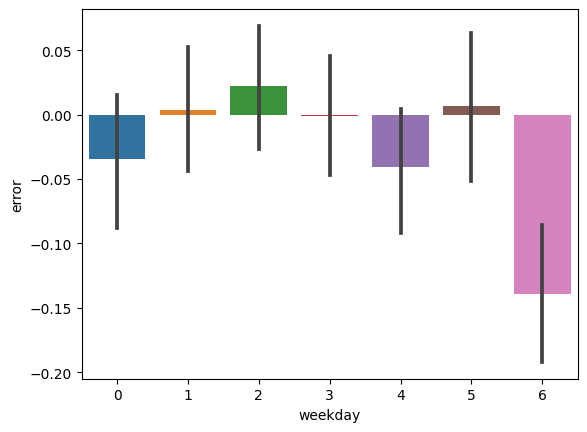

In [179]:
sns.barplot(test_data_with_pred, x=test_data_with_pred['weekday'], y=test_data_with_pred['error'])

<Axes: xlabel='hour', ylabel='error'>

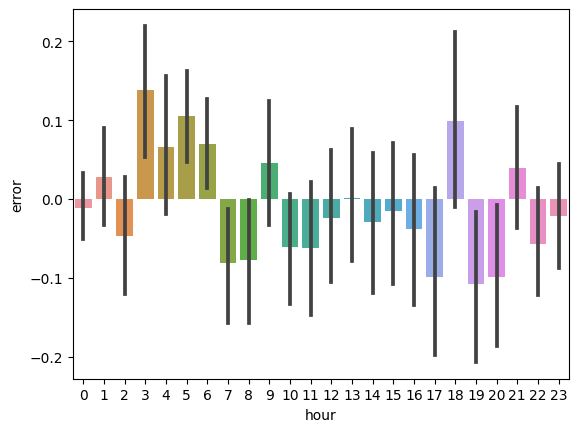

In [180]:
sns.barplot(test_data_with_pred, x=test_data_with_pred['hour'], y=test_data_with_pred['error'])